Descriptive analysis on the UNHCR data

In [1]:
import pandas as pd

df = pd.read_csv('../../data/raw/data.csv', engine="pyarrow").drop('', axis=1).drop_duplicates(subset=['Country_o','Country_d','year'])
df = df[(df.year <=2021)]

In [12]:
df.groupby(['iso_o','year']).newarrival.sum()

iso_o  year
ABW    2000       0.0
       2001       0.0
       2002       0.0
       2003       0.0
       2004       0.0
                ...  
ZWE    2017    4523.0
       2018    1908.0
       2019    3371.0
       2020    1196.0
       2021     640.0
Name: newarrival, Length: 4312, dtype: float64

Is this dataset balanced?

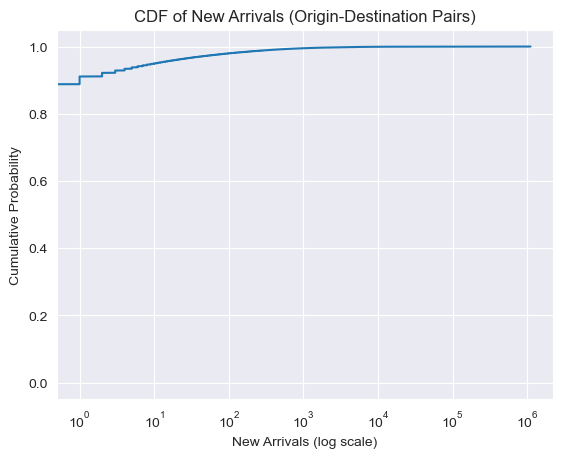

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

sorted_values = np.sort(df.newarrival)
cumulative_prob = np.arange(len(sorted_values)) / float(len(sorted_values))

plt.plot(sorted_values, cumulative_prob)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('New Arrivals (log scale)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of New Arrivals (Origin-Destination Pairs)')
plt.grid(True)
plt.show()

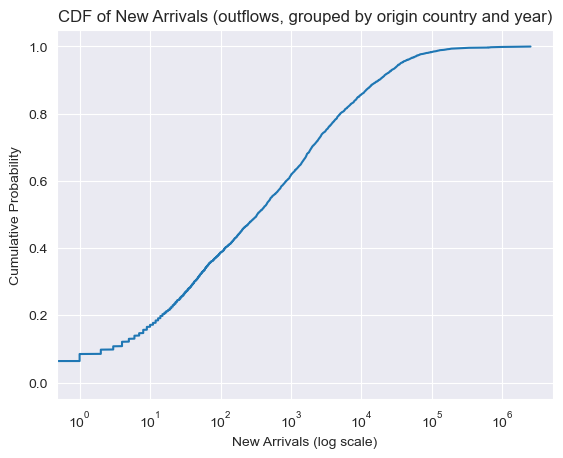

In [10]:
sorted_values = np.sort(df.groupby(['year','iso_o']).agg({'newarrival':'sum'}).newarrival.values)
cumulative_prob = np.arange(len(sorted_values)) / float(len(sorted_values))

plt.plot(sorted_values, cumulative_prob)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('New Arrivals (log scale)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of New Arrivals (outflows, grouped by origin country and year)')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Number of Refugees from Syria to Turkey'}, xlabel='year'>

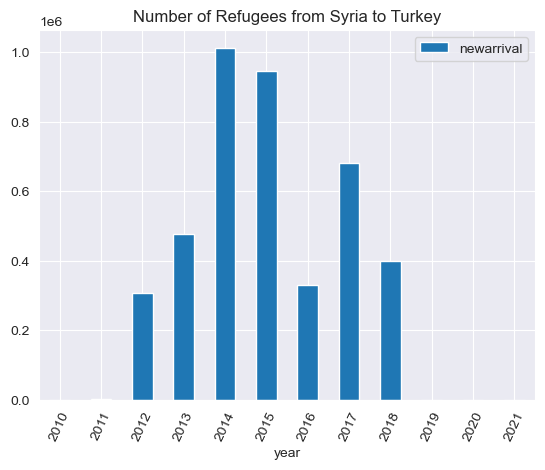

In [6]:
import seaborn as sns
sns.set_style('darkgrid')
df[(df.Id == 'SYRTUR') & (df.year >= 2010)].plot.bar(x='year',y='newarrival', title='Number of Refugees from Syria to Turkey', rot=65)

In [2]:
import plotly.express as px

norm_df = df[(df.iso_o == 'VEN') & (df.year > 2016) & (df.newarrival>10000)]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('int')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving Venezuela by Destination Country", orientation = 'h')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_42732/1575866411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())


In [3]:
import plotly.express as px

norm_df = df[(df.iso_o == 'AFG') & (df.year > 2014) & (df.newarrival>10000) ]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('str')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving Afghanistan by Destination Country", orientation = 'h')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_42732/4207888806.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
country_year = df.groupby(['iso_o', 'year']).newarrival.sum().reset_index()
country_year[country_year.newarrival > 1000000].iso_o.unique()

array(['SSD', 'SYR', 'VEN'], dtype=object)

In [4]:
import plotly.express as px

norm_df = df[(df.iso_o == 'SYR') & (df.year >= 2012) & (df.year <= 2018)  & (df.newarrival > 10000) ]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('str')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving Syria by Destination Country", orientation = 'h')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_42732/3475129641.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
import plotly.express as px

norm_df = df[(df.iso_o == 'SSD') & (df.year >= 2014)  ]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('str')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving South Sudan by Country", orientation = 'h', labels='iso_d')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_27028/3372920788.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Percent of refugees that go to contiguous countries

In [1]:
import pandas as pd

df = pd.read_csv('../../data/clean/unhcr.csv', engine='pyarrow').groupby(['iso_o','iso_d']).agg({'newarrival':'sum','contig':'first'}).reset_index()

In [3]:
import igraph as ig

df_network = df[df.contig == 1]

graph2 = ig.Graph.TupleList(df_network[['iso_o','iso_d']].itertuples(index=False), directed=False)


def degrees_of_separation(graph, source_name, target_name):
    """
    Returns the number of degrees of separation between two nodes in a graph.
    
    Parameters:
    graph (igraph.Graph): The graph to compute the degrees of separation in.
    source_name (str): The name of the source node.
    target_name (str): The name of the target node.
    
    Returns:
    int: The number of degrees of separation between the source and target nodes.
          Returns None if the nodes are not connected.
    """
    try:
        source_idx = graph.vs.find(name=source_name).index
        target_idx = graph.vs.find(name=target_name).index
        shortest_path = graph.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]
        return len(shortest_path) - 1
    except ValueError:
        return -1
    
df.apply(lambda x: degrees_of_separation(graph2, x.iso_o, x.iso_d), axis=1)
graph2.vs['label'] = graph2.vs['name']

df['degrees_of_separation'] = df.apply(lambda x: degrees_of_separation(graph2, x.iso_o, x.iso_d), axis=1)

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_44215/3261220497.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:440
  shortest_path = graph.get_shortest_paths(source_idx, to=target_idx, output="vpath")[0]


<Axes: title={'center': 'Number of new arrivals by degrees of separation'}, xlabel='degrees_of_separation'>

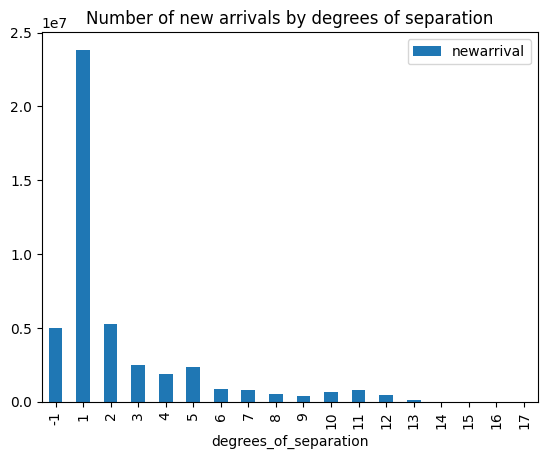

In [4]:
df.groupby('degrees_of_separation', as_index=False).newarrival.sum().plot.bar(x='degrees_of_separation',y='newarrival', title='Number of new arrivals by degrees of separation')

In [20]:
df[df.degrees_of_separation == -1].sort_values(by='newarrival',ascending=False).head(10)

,iso_o,iso_d,newarrival,contig,degrees_of_separation
6617,CHN,USA,346410.0,0,-1
30659,SRB,DEU,183184.0,0,-1
14807,HTI,USA,137353.0,0,-1
36518,VEN,ESP,121190.0,0,-1
36513,VEN,DOM,95482.0,0,-1
7462,COL,ESP,94783.0,0,-1
22191,MKD,SRB,93303.0,0,-1
15392,IND,USA,84726.0,0,-1
15661,IRN,GBR,82073.0,0,-1
30673,SRB,FRA,78985.0,0,-1


In [9]:
import pandas as pd
df_test = pd.read_csv('../../data/clean/unhcr.csv', engine='pyarrow').groupby(['iso_o','year']).agg({'newarrival':'sum'})
df_test2 = pd.read_csv('../../data/clean/unhcr.csv', engine='pyarrow').groupby(['iso_o','iso_d']).agg({'newarrival':'sum'})
df_test3 = pd.read_csv('../../data/clean/unhcr.csv', engine='pyarrow').set_index(['iso_o','iso_d','year'])

In [10]:
def filter_multi(df,col,val):
    col_index = pd.Series(df.index.names)[(pd.Series(df.index.names) == col)].index.tolist()[0]
    if val is type(str):
        return np.in1d(df.index.get_level_values(col_index), [val])
    else:
        return pd.Series(df.index.get_level_values(col_index)).isin(val).values

<Axes: xlabel='iso_o,iso_d,year'>

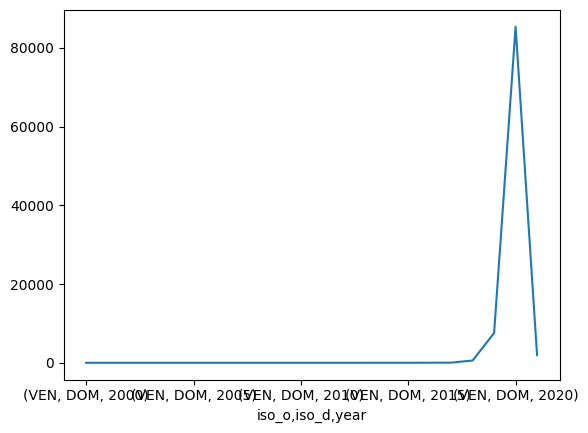

In [12]:
df_test3[filter_multi(df_test3, 'iso_o', ['VEN']) & filter_multi(df_test3, 'iso_d',['DOM'])].newarrival.plot()

In [45]:
df_test2[filter_multi(df_test2, 'iso_o',['AFG'])].sort_values(by='newarrival',ascending=False)

newarrival
iso_o iso_d            
AFG   TUR      347179.0
      DEU      287772.0
      GRC      121122.0
      AUT      107030.0
      HUN       80226.0
...                 ...
      IRN           0.0
      HND           0.0
      GUY           0.0
      GRD           0.0
      LBR           0.0

[195 rows x 1 columns]

In [2]:
df_test[filter_multi(df_test,'iso_o',['DOM'])].plot()

NameError: name 'df_test' is not defined